In [1]:
### L7 Numerical Linear Algebra 3 (indirect iterative solvers with approx soln)
'''
- Introduce ill-conditioned matrices (via martix norms and the condition number)
- Consider direct vs indirect (or iterative) methods
    - Indirect (iterative) methods --> more viable in large matrix size (10,000)
- Example iterative algorithm: the Jacobi and Gauss-Seidel methods
- A pointe to more advance algorithms (supplementary readings)
'''

import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as sl

In [ ]:
### Conditioned (or lack of, ie ill-conditioned) matrices
# matrix non-singular (det(A) != 0) then inverse exists --> linear system with A has unique soln
# matrix nearly singular (det(A) is really small) --> compare size of det(A) with the norm to define smallness

## norms
# matrix norms --> similar to vector norms where A is shape m x n
    # give different results but are equivalent in that they are always within a constant factor of one another
    # can mix as long as v and A are of the same size
    # sl.norm(A) gives Euclidean/ Forbenius norm
    # forbenius and two-norm are DIFFERENT

In [3]:
## Ex 7.1 code to explicitly compute the two matrix norms and compare with scipy
    # Forbenius and maximum absolute row-sum norms

def Forbenius_norm(A):
    m, n = np.shape(A)

    norm = 0.

    for i in range(0, m):
        for j in range(0, n):
            norm += A[i, j] ** 2
            # remember to square

    return np.sqrt(norm) # no need abs

def max_abs_norm(A):
    m, n = np.shape(A)

    max_norm_sum = 0

    for i in range(0, m):
        "iterates over each row"

        norm_sum = np.sum(np.abs(A[i]))
        "calculates sum of absolute values of all (column) elements in current row"

        max_norm_sum = norm_sum if norm_sum > max_norm_sum else max_norm_sum
        "keeps track of max sum so far"

    return max_norm_sum


A = np.array([[10., 2., 1.],
                 [6., 5., 4.],
                 [1., 4., 7.]])

print("A")
print(A)

print("Forbenius norm:", Forbenius_norm(A))
print("sl.norm(A, 'fro')", sl.norm(A, 'fro'))

print('\nForbenius = sl.norm fro?: ',np.allclose(Forbenius_norm(A), sl.norm(A, 'fro')))


print("max_abs norm:", max_abs_norm(A))
print("sl.norm(A, np.inf)", sl.norm(A, np.inf))

print('\nmax_abs = sl.norm np.inf?: ',np.allclose(max_abs_norm(A), sl.norm(A, np.inf)))



A
[[10.  2.  1.]
 [ 6.  5.  4.]
 [ 1.  4.  7.]]
Forbenius norm: 15.748015748023622
sl.norm(A, 'fro') 15.748015748023622

Forbenius = sl.norm fro?:  True
max_abs norm: 15.0
sl.norm(A, np.inf) 15.0

max_abs = sl.norm np.inf?:  True


In [10]:
### Matrix conditioning
# matrix condition number: close to 1 --> well conditioned
    # increases with degree of ill-conditioning to inf

## Ex 7.2 consider range of valyes for e and calculate determinant and condition

A = np.array([[2., 1.], 
            [2., 1.]])

" if e = 0 --> eqns not linear independant"
"determinant = 0 and condition number = inf"

b = np.array([3., 0.])

print("A b")
print(A, b)

for i in range(3):
    A[1, 1] += 0.001
    print("A[1, 1] =", A[1, 1])
    print("determinant sl.det(A)", sl.det(A))
    print("np.linalg.cond(A)", np.linalg.cond(A))
    print("solution sl.inv(A) @ b:", sl.inv(A) @ b)



A b
[[2. 1.]
 [2. 1.]] [3. 0.]
A[1, 1] = 1.001
determinant sl.det(A) 0.0019999999999997797
np.linalg.cond(A) 5001.000300039825
solution sl.inv(A) @ b: [ 1501.5 -3000. ]
A[1, 1] = 1.0019999999999998
determinant sl.det(A) 0.0039999999999995595
np.linalg.cond(A) 2501.000600160335
solution sl.inv(A) @ b: [  751.5 -1500. ]
A[1, 1] = 1.0029999999999997
determinant sl.det(A) 0.005999999999999339
np.linalg.cond(A) 1667.6675670268894
solution sl.inv(A) @ b: [  501.5 -1000. ]


In [ ]:
### Direct and Indirect (iterative) methods
## Direct methods --> operations on linear eqns eg substitution (gaussian)
    # transforms eqns to eliminate unknowns hence allowing for easy substitution
    # Cramer's rule --> explicit formula for inverse of matrix/ solution
    # computational cost of Gaussian scales n^3 and Cramer scales (n+1)!
        # n = no of unknowns/ degrees of freedom

    # advantage: exact soln (ignoring round off errors)
    # disadvantage: expensive if n is large

## Indirct (iterative) algorithms
    # start at initial guess at soln (x0) and iteratively improve this
    # uses norm of residual vector (rk := Axk - b) with approx soln xk as a measure for how close we are to soln
        # stop at some small residual norm tolerance level (never hits zero exactly)

sl.inv(A) @ b [-0.16340816 -0.01532706  0.27335264  0.36893555]
x_jab [-0.16340807 -0.01532701  0.27335259  0.36893548]
Total number of iterations:  23
np.allclose True
x_gauss [-0.16340812 -0.01532701  0.27335261  0.36893553]
Total number of iterations:  14
np.allclose True


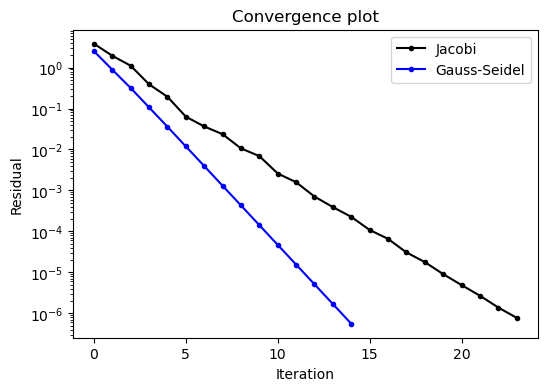

In [11]:
### Jacobi's method (iterative)
    # xi term --> term with Aii (diagonal)
    # Gauss-Seidel's method --? uses updated components as soon as they become available
        # No need to store x of both new and old iteration
## Ex 7.3 Gauss-Seidel's method using sample Jacobi code

# copy-pasted
def jacobi(A, b, maxit=500, tol=1.e-6):
    m, n = A.shape
    x = np.zeros(A.shape[0])
    residuals = []
    for it in range(maxit):
        x_new = np.zeros(A.shape[0])
        for i in range(m):
            x_new[i] = (1./A[i, i]) * (b[i] 
                                       - np.dot(A[i, :i], x[:i]) 
                                       - np.dot(A[i, i + 1:], x[i + 1:]))
        x = x_new # update old solution 
        residual = sl.norm(A@x - b)
        residuals.append(residual)
        if (residual < tol): break       
    return x, residuals, it

def gauss_seidel(A, b, maxit=1000, tol=1.e-6):
    # an initial guess at the solution - here just a vector of zeros of length the number of rows in A
    x = np.zeros(A.shape[0]) 

    # for later plotting let's start a list to store the residuals
    residuals=[] 

    # now iterate
    for it in range(maxit):

        for i in range(A.shape[0]):
            x[i] = (1./A[i, i]) * (b[i] 
                                    - np.dot(A[i, :i], x[:i])
                                    - np.dot(A[i, i+1:], x[i+1:]))

            '''
            Eg iteration 59: 
                (iteration 58 has soln x_58 and iteration 59 has soln x_59)

                in both cases x_59 is made by iteration over every diagonal element in A (0 to m-1)

                in Jacobi every element in x_59 is PURELY dependent on x_58
                    - n+new stores x_59 while x_58 is used in x[i] loop

                in Gauss-Seidel (eg for 3x3 matrix):
                    arrow = what LHS depends on
                x_59[0] --> x_58[1], x_58[2]
                x_59[1] --> x_59[0], x_58[2]
                x_59[2] --> x_59[0], x_59[1]

            Gauss-Seidel takes less iterations as Jacobi in iter 59 is only dependant on iter 58 whereas
                Gauss-Seidel uses updated knowledge immediately and does get affected by what you do in iter 59
            '''
        residual = sl.norm(A @ x - b)  # calculate the norm of the residual r=Ax-b for this latest guess
        residuals.append(residual) # store it for later plotting
        if (residual < tol): # if less than our required tolerance jump out of the iteration and end.
            break

    return x, residuals, it

A = np.array([[10., 2., 3., 5.],
                [1., 14., 6., 2.],
                [-1., 4., 16., -4],
                [5. ,4. ,3. ,11. ]])
b = np.array([1., 2., 3., 4.])

x_jab, res_jab, it_j = jacobi(A, b)
x_gauss, res_gauss, it_g = gauss_seidel(A, b)

print("sl.inv(A) @ b", sl.inv(A) @ b)

print("x_jab", x_jab)
print('Total number of iterations: ', it_j)
print("np.allclose", np.allclose(sl.inv(A)@b, x_jab))


print("x_gauss", x_gauss)
print('Total number of iterations: ', it_g)
print("np.allclose", np.allclose(sl.inv(A)@b, x_gauss))

# plot the log of the residual against iteration number 
fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot(111)

ax1.semilogy(res_jab,'k.-',label='Jacobi') # plot the log of the residual against iteration number 
ax1.semilogy(res_gauss,'b.-',label='Gauss-Seidel')
" semilog plot (log on y-axis and linear on x-axis"

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Residual')
ax1.set_title('Convergence plot')
ax1.legend(loc='best')
plt.show()